# Исследование надежности заемщиков


**Описание проекта.**</br>
Заказчик — кредитный отдел банка. Входные данные от банка — статистика о платёжеспособности клиентов.</br>
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** - Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

**Описание данных.**
 - `children` — количество детей в семье
 - `days_employed` — общий трудовой стаж в днях
 - `dob_years` — возраст клиента в годах
 - `education` — уровень образования клиента
 - `education_id` — идентификатор уровня образования
 - `family_status` — семейное положение
 - `family_status_id` — идентификатор семейного положения
 - `gender` — пол клиента
 - `income_type` — тип занятости
 - `debt` — имел ли задолженность по возврату кредитов
 - `total_income` — ежемесячный доход
 - `purpose` — цель получения кредита

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

data = pd.read_csv('/DS/Yandex_Practikum/Projects/datasets/data.csv')


**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform(lambda x : x.median()))

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data['debt'] = data['debt']*100

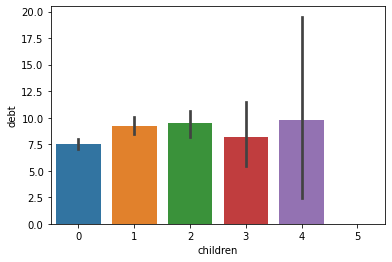

In [23]:
import seaborn as sb
import numpy as np
plot = sb.barplot(x='children',y='debt', data = data)

In [24]:
data.groupby('children')['children'].count()

children
0    14107
1     4809
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

У людей с 0 детей в среднем 7.5 из 100 сдолгами, с 1 ребенком 9 из 100 и так далее

**Вывод:** Черные линии это доверительный интервал 95%, он формируется из множества выборок по мере расчета среднего арифметического. по Мере увеличения количества детей с 0 до 4 доверительный интервал увеличивается. Значит есть выборки в генеральной совокупности, где среднее арифметическое сильно отличается от ср. ариф. генеральной совокупности. Итого, по мере возрастания кол-ва детей от 0 до 4 риск невозврата кредита возрастает. Просроченные кредиты у клиетов с 5 детьми отсутсвуют вовсе.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'женат / замужем'),
  Text(1, 0, 'гражданский брак'),
  Text(2, 0, 'вдовец / вдова'),
  Text(3, 0, 'в разводе'),
  Text(4, 0, 'Не женат / не замужем')])

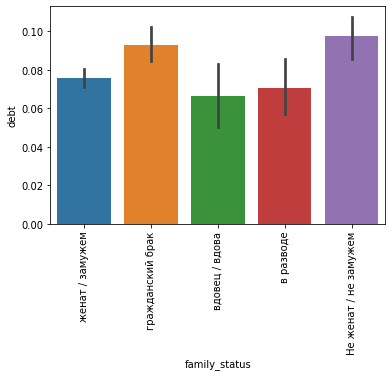

In [43]:
import matplotlib.pyplot as plt
plot = sb.barplot(x='family_status',y='debt', data = data)
plt.xticks(rotation=90)
#for item in plot.get_xticklabels():
#    item.set_rotation(20)

**Вывод:** Наибольший процент невозврата имеют люди в гражданском браке и не женат / не замужем, затем женат / замуженм и наименьший процент люди в развроде и вдовы / вдовцы.

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

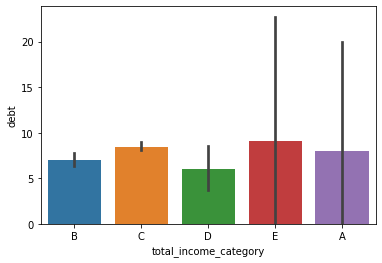

In [26]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
plot = sb.barplot(x='total_income_category',y='debt', data = data)

In [27]:
data.groupby('total_income_category')['total_income_category'].count()

total_income_category
A       25
B     5014
C    15938
D      349
E       22
Name: total_income_category, dtype: int64

**Вывод:** четко выраженной зависимости нет. Большой доверительный интервал в категории А и Е обусловлен маленьким количеством значеий в выборке. И доверительный интервал уменьшается по мере увеличения количетва значений в выборке, что вполне ожидаемо.

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

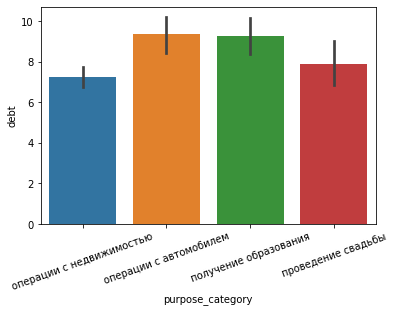

In [28]:
plot = sb.barplot(x='purpose_category',y='debt', data = data)
for item in plot.get_xticklabels():
    item.set_rotation(20)

**Вывод:** Наибольший процент просроченных кредитом имеют люди с целью кредита для автомобиля и образования, наименьший для недвижимости и свадьбы.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:*  Пропуск обусловлен отсутствием работы, либо работал неофициально.

In [29]:
# Код ревьюера
import pandas as pd

df_demo = pd.read_csv('/datasets/data.csv')

df_demo.groupby('income_type').agg({'total_income' : lambda x : x.isna().mean().round(2)})

,total_income
income_type,
безработный,0.00
в декрете,0.00
госслужащий,0.10
компаньон,0.10
пенсионер,0.11
предприниматель,0.50
сотрудник,0.10
студент,0.00


**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* В выборке могут встречаться аномально высокие значения или аномально маленькие. Например, если из 100 человек 99 зарабатывают 10 рублей, а 1 1000 рублей.То среднее арифметическое будет 19,9 рублей, а медианное значение 10 рублей. Тем самым эти аномальные значения в выборке могут вносить значительные коррективы в результаты исследования. Поэтому медиану брать лучше.

## Общий вывод.

Из всего вышеизложенного следует обратить внимание на размер семьи и на семейное положение. По мере увеличения количества детей от 0 до 4, количество невозвратов увеличивается. В гражданском браке и (не женат / не замужем) имеют наибольший процент невозврата кредита.

In [30]:
data['debt'] = data['debt'] / 100

data_grouped = data.groupby(['children','family_status']).agg(число_клиентов=('debt','count'),
                                               число_должников=('debt','sum'),
                                               доля_должников=('debt','mean')
                                              ) \
                                          .style.format({'доля_должников' : '{:.2%}'}).background_gradient(subset=('доля_должников'))

In [35]:
data_grouped